In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/FullData - Main DF.csv")

In [3]:
df.head()

,CE,PS1,PS2,PS3,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,SE,CP,CoolerCondition,ValveCondition,InternalPumpLeakage,Hydraulic,StableFlag
0,39.601350,160.673492,109.466914,1.991475,9.842170,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,59.157183,1.862750,0,3,0,3,1
1,25.786433,160.603320,109.354890,1.976234,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,59.335617,1.255550,0,3,0,3,1
2,22.218233,160.347720,109.158845,1.972224,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,59.543150,1.113217,0,3,0,3,1
3,20.459817,160.188088,109.064807,1.946576,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,59.794900,1.062150,0,3,0,3,1
4,19.787017,160.000472,108.931434,1.922707,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,59.455267,1.070467,0,3,0,3,1


In [5]:
df.shape

(2205, 21)

In [4]:
df.columns

Index(['CE', 'PS1', 'PS2', 'PS3', 'PS5', 'PS6', 'EPS1', 'FS1', 'FS2', 'TS1',
       'TS2', 'TS3', 'TS4', 'VS1', 'SE', 'CP', 'CoolerCondition',
       'ValveCondition', 'InternalPumpLeakage', 'Hydraulic', 'StableFlag'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CE                   2205 non-null   float64
 1   PS1                  2205 non-null   float64
 2   PS2                  2205 non-null   float64
 3   PS3                  2205 non-null   float64
 4   PS5                  2205 non-null   float64
 5   PS6                  2205 non-null   float64
 6   EPS1                 2205 non-null   float64
 7   FS1                  2205 non-null   float64
 8   FS2                  2205 non-null   float64
 9   TS1                  2205 non-null   float64
 10  TS2                  2205 non-null   float64
 11  TS3                  2205 non-null   float64
 12  TS4                  2205 non-null   float64
 13  VS1                  2205 non-null   float64
 14  SE                   2205 non-null   float64
 15  CP                   2205 non-null   f

In [6]:
df.dtypes[df.dtypes=="object"]

Series([], dtype: object)

In [8]:
df=df.drop_duplicates() #to remove duplicates

In [9]:
df.isnull().sum()

CE                     0
PS1                    0
PS2                    0
PS3                    0
PS5                    0
PS6                    0
EPS1                   0
FS1                    0
FS2                    0
TS1                    0
TS2                    0
TS3                    0
TS4                    0
VS1                    0
SE                     0
CP                     0
CoolerCondition        0
ValveCondition         0
InternalPumpLeakage    0
Hydraulic              0
StableFlag             0
dtype: int64

In [15]:
x=df[["CE","PS1","PS2","PS3","PS5","PS6","EPS1","FS1","FS2","TS1","TS2","TS3","TS4","VS1","SE","CP"]]
y=df[["InternalPumpLeakage"]]

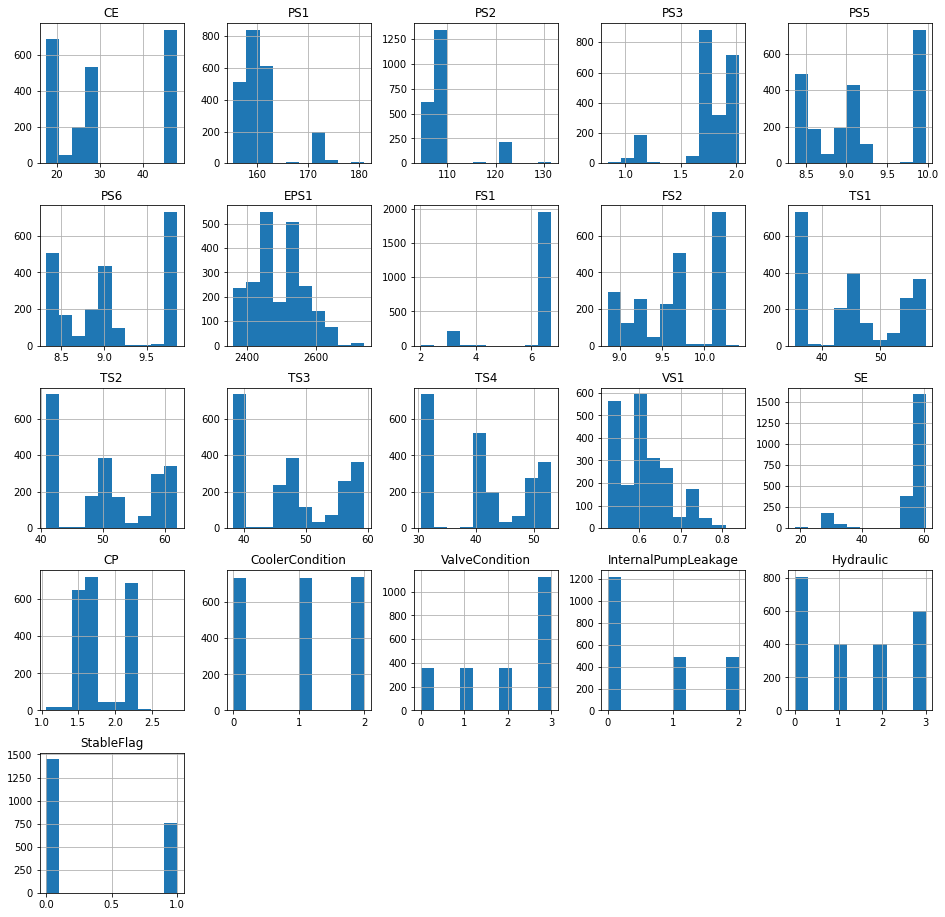

In [16]:
df.hist(figsize=(16,16),bins=10)
plt.show()

In [17]:
x

,CE,PS1,PS2,PS3,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,SE,CP
0,39.601350,160.673492,109.466914,1.991475,9.842170,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,59.157183,1.862750
1,25.786433,160.603320,109.354890,1.976234,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,59.335617,1.255550
2,22.218233,160.347720,109.158845,1.972224,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,59.543150,1.113217
3,20.459817,160.188088,109.064807,1.946576,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,59.794900,1.062150
4,19.787017,160.000472,108.931434,1.922707,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,59.455267,1.070467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,46.628517,161.227572,109.779581,2.001438,9.972037,9.850361,2543.911033,6.689930,10.184515,35.313783,40.874800,38.269267,30.404733,0.550833,59.033100,2.160600
2201,46.689817,161.206070,109.787480,1.998781,9.966184,9.844854,2543.411333,6.692182,10.177767,35.321600,40.868883,38.268250,30.416233,0.547483,59.068000,2.151450
2202,46.472300,161.192120,109.756174,1.993436,9.964329,9.842629,2542.729767,6.693277,10.176172,35.319183,40.875950,38.246367,30.426250,0.545233,59.132350,2.143300
2203,46.544967,161.208917,109.793884,2.007077,9.968232,9.846690,2544.046333,6.684128,10.178353,35.324767,40.876067,38.245733,30.414283,0.537017,58.970800,2.148483


In [18]:
y


,InternalPumpLeakage
0,0
1,0
2,0
3,0
4,0
...,...
2200,0
2201,0
2202,0
2203,0


Next importing train_ teest_split to split the traing and validation set.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [24]:
xtrain

,CE,PS1,PS2,PS3,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,SE,CP
782,26.284467,158.128318,107.166253,1.788949,8.969115,8.896433,2445.411467,6.645402,9.600688,47.277017,52.371283,49.444733,42.799117,0.600333,59.726383,1.719617
268,20.134017,156.429120,105.379299,1.691460,8.523136,8.464986,2405.285333,6.359045,9.192670,54.420250,58.908083,55.904500,49.640767,0.663833,57.508983,1.551667
1530,46.296133,161.016822,109.574000,2.010661,9.967379,9.846895,2543.339000,6.683375,10.157742,35.391267,41.008267,38.362817,30.554850,0.568350,58.899150,2.136133
846,26.287783,158.313765,107.330912,1.790952,8.996815,8.920623,2449.703400,6.635187,9.615922,46.702300,51.792017,48.905733,42.306967,0.599633,59.596350,1.710783
305,20.481067,156.947753,105.764658,1.749061,8.485503,8.428560,2393.422033,6.575555,9.154605,54.851867,59.429883,56.341967,49.939250,0.683850,60.002233,1.577383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,18.268217,158.265087,107.516762,1.731176,8.796409,8.727124,2432.505433,6.634792,9.574230,49.318750,53.870583,50.721200,45.496317,0.637733,60.216483,1.348583
1807,47.205000,160.257223,109.049591,1.917019,9.836545,9.721129,2561.439233,6.428560,10.168903,36.300550,41.916250,39.184433,31.336100,0.538733,55.998133,2.150450
2008,46.954600,160.567967,109.122744,1.932686,9.838475,9.724334,2548.211467,6.515650,10.147368,36.271367,41.864183,39.144383,31.286117,0.534433,57.150633,2.147883
1698,47.540750,160.507947,109.139517,1.921993,9.942519,9.823480,2578.800700,6.429530,10.205947,35.710050,41.245517,38.587667,30.651233,0.536467,55.650983,2.180317


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model1=DecisionTreeClassifier()

In [27]:
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
model1_output=model1.predict(xtest)

In [29]:
model1_output

array([1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2,
       0, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0,

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
acc1=accuracy_score(model1_output,ytest)

In [37]:
acc1 #accuracy for InternalPumpLeakage

0.9750566893424036

In [38]:
model1.predict([[39.601350,160.673492,109.466914,1.991475,9.842170,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,59.157183,1.862750]])

array([0])